In [12]:
# Importing the necessary packages

import numpy as np
np.random.seed(42)

import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



from sklearn.inspection import permutation_importance
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')
#add other imports here

In [2]:
# Loading the Dataset with relative path
dataFrame = pd.read_csv('energydata_complete.csv')

In [3]:
procData = dataFrame.dropna(how = 'all', axis = 1, inplace = False)
# Removing rows with null values
procData = procData.dropna() 
# Combining Appliances and Lights column as new Power column
procData['Power'] = procData['Appliances'].astype(int) + procData['lights'].astype(int)
# Drop the old Appliance column
procData = procData.drop('Appliances', axis = 1);
# Drop the old lights column
procData = procData.drop('lights', axis = 1);
# Drop the date column as it is not of importance for our study
procData = procData.drop('date', axis = 1);   
# Drop the other columns which are not of importance for our study ( 2 random variable columns)
procData = procData.drop(['rv1','rv2'], axis=1)

# Defining the X (input) and y(target variable) for our study
X= procData.drop(['Power'], axis = 1)
y = procData["Power"] 

# Splitting the data, keeping 30% as reserved for testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size =0.30, random_state=42)
  
# printing a view of the Processed Dataframe
print(procData)


              T1       RH_1         T2       RH_2         T3       RH_3  \
0      19.890000  47.596667  19.200000  44.790000  19.790000  44.730000   
1      19.890000  46.693333  19.200000  44.722500  19.790000  44.790000   
2      19.890000  46.300000  19.200000  44.626667  19.790000  44.933333   
3      19.890000  46.066667  19.200000  44.590000  19.790000  45.000000   
4      19.890000  46.333333  19.200000  44.530000  19.790000  45.000000   
...          ...        ...        ...        ...        ...        ...   
19730  25.566667  46.560000  25.890000  42.025714  27.200000  41.163333   
19731  25.500000  46.500000  25.754000  42.080000  27.133333  41.223333   
19732  25.500000  46.596667  25.628571  42.768571  27.050000  41.690000   
19733  25.500000  46.990000  25.414000  43.036000  26.890000  41.290000   
19734  25.500000  46.600000  25.264286  42.971429  26.823333  41.156667   

              T4       RH_4         T5       RH_5  ...       RH_8         T9  \
0      19.000000  4

In [4]:

from sklearn.inspection import permutation_importance
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(Xtrain)
X_test = scaler.transform(Xtest)


# Creating the SVR model
# kernel is selected as linear, with maximum iteration of 10000, taking 10 iterations
svr = SVR(kernel='linear', C=1.0, epsilon=0.2, max_iter=10000)
for i in range(10):
    # Fitting the SVR model
    svr.fit(X_train, ytrain)

# Making predictions on testing set
y_pred = svr.predict(X_test)




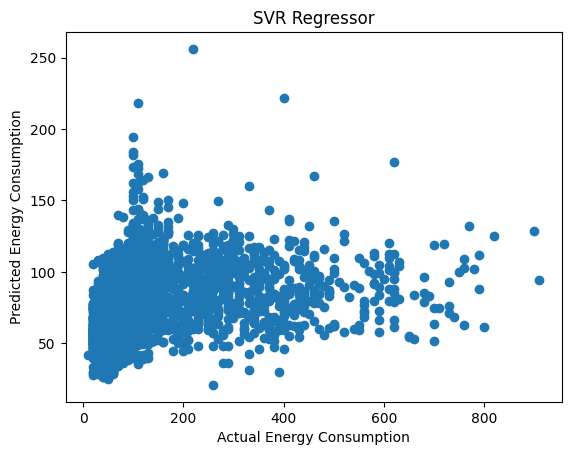

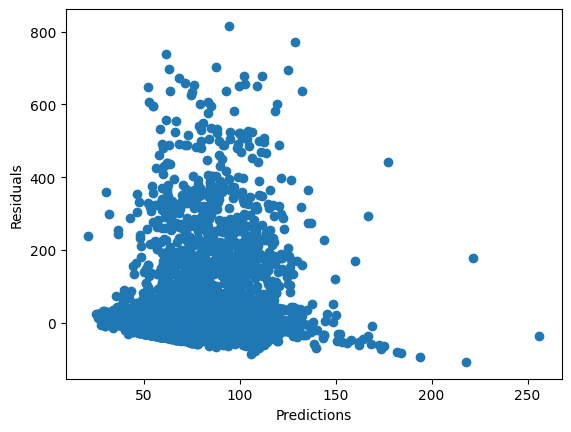

In [5]:
# Plotting the predicted values vs. the true values
plt.scatter(ytest, y_pred)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('SVR Regressor')
plt.show()


# Plot the residuals
plt.scatter(y_pred, ytest - y_pred)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

In [8]:
# Calculating evaluation metrics
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)


print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print()

MSE: 10323.981201489667
MAE: 46.34175237923436
R2 Score: 0.0332471043227075



The results suggest that there is a high degree of variability in the data, with large Mean Squared Error (MSE) of 10323.981 and a relatively large Mean Absolute Error (MAE) of 46.341. The R2 Score of 0.033 indicates that only a small portion of the variability in the data is explained by the model.

In [10]:
# Calculating feature importance using coefficient values
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': abs(svr.coef_.ravel())})
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)
print(coef_df)


        Feature  Coefficient
22   Visibility     0.029485
19  Press_mm_hg     0.289571
8            T5     0.531858
5          RH_3     1.235210
13         RH_7     1.315146
20       RH_out     2.202175
21    Windspeed     2.974992
9          RH_5     3.476690
18        T_out     3.504869
23    Tdewpoint     3.893861
11         RH_6     3.921019
6            T4     4.027379
7          RH_4     5.433857
17         RH_9     6.436148
12           T7     6.977584
0            T1     9.693432
4            T3    11.867839
10           T6    13.371985
2            T2    14.701653
14           T8    17.927789
15         RH_8    18.252832
3          RH_2    19.849439
16           T9    24.459933
1          RH_1    33.097780


In [11]:
print(procData)

              T1       RH_1         T2       RH_2         T3       RH_3  \
0      19.890000  47.596667  19.200000  44.790000  19.790000  44.730000   
1      19.890000  46.693333  19.200000  44.722500  19.790000  44.790000   
2      19.890000  46.300000  19.200000  44.626667  19.790000  44.933333   
3      19.890000  46.066667  19.200000  44.590000  19.790000  45.000000   
4      19.890000  46.333333  19.200000  44.530000  19.790000  45.000000   
...          ...        ...        ...        ...        ...        ...   
19730  25.566667  46.560000  25.890000  42.025714  27.200000  41.163333   
19731  25.500000  46.500000  25.754000  42.080000  27.133333  41.223333   
19732  25.500000  46.596667  25.628571  42.768571  27.050000  41.690000   
19733  25.500000  46.990000  25.414000  43.036000  26.890000  41.290000   
19734  25.500000  46.600000  25.264286  42.971429  26.823333  41.156667   

              T4       RH_4         T5       RH_5  ...       RH_8         T9  \
0      19.000000  4

In [13]:
# Defining the X (input) and y(target variable) for our study
# Dropping the columns of less importance according to the feature importance conducted

X1= procData.drop(['Power','Visibility','Press_mm_hg', 'RH_5','T5','RH_out','Windspeed','T_out'], axis = 1)
y1 = procData["Power"] 

# Splitting the data, keeping 30% as reserved for testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X1,y1,test_size =0.30, random_state=42)
  
# printing a view of the Processed Dataframe
print(Xtrain)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(Xtrain)
X_test = scaler.transform(Xtest)


# Creating the SVR model
# kernel is selected as linear, with maximum iteration of 10000, iteration range is increased to 100
svr = SVR(kernel='linear', C=1.0, epsilon=0.2, max_iter=10000)
for i in range(100):
    # Fitting the SVR model
    svr.fit(X_train, ytrain)

# Making predictions on testing set
y_pred = svr.predict(X_test)


              T1       RH_1         T2       RH_2         T3   RH_3     T4  \
9129   21.500000  35.626667  17.790000  40.590000  21.700000  35.26  20.39   
2453   19.500000  44.560000  18.700000  44.290000  19.823333  44.50  18.10   
9152   20.790000  35.400000  16.890000  42.030000  21.700000  36.00  19.70   
12694  22.100000  43.260000  19.963333  45.500000  23.390000  39.79  21.10   
16952  24.700000  42.360000  29.856667  31.790000  26.171429  38.59  25.10   
...          ...        ...        ...        ...        ...    ...    ...   
11284  21.760000  40.900000  19.390000  43.090000  23.000000  39.00  21.50   
11964  22.390000  43.700000  22.000000  42.066667  22.700000  41.23  21.29   
5390   20.290000  35.700000  18.200000  37.590000  20.100000  37.59  18.20   
860    21.790000  35.560000  20.434000  35.116000  21.200000  36.90  21.10   
15795  21.323333  37.730000  19.890000  38.566667  22.700000  36.59  19.70   

            RH_4         T6       RH_6     T7    RH_7         T

The time taken was 16mins 20sec


In [14]:
# Calculating evaluation metrics for the above model
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print("Iteration:", i+1)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print()

Iteration: 100
MSE: 10382.769632132313
MAE: 46.4943119681395
R2 Score: 0.027742068576623202



The current results are slightly better than the previous iteration. MSE has increased a bit but is almost similar , and the MAE has also increased slightly from 46.341 to 46.494. The R2 Score has also decreased slightly from 0.033 to 0.027, indicating that the model is almost similar and performance has not improved.



In [15]:
# Calculating feature importance using coefficient values
coef_df = pd.DataFrame({'Feature': X1.columns, 'Coefficient': abs(svr.coef_.ravel())})
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)
print(coef_df)


      Feature  Coefficient
11       RH_7     0.682429
5        RH_3     1.446452
6          T4     3.501067
16  Tdewpoint     4.670899
9        RH_6     5.843923
7        RH_4     6.491981
15       RH_9     6.788423
10         T7     7.493927
0          T1    10.399048
8          T6    10.918524
4          T3    11.974162
2          T2    14.451563
13       RH_8    17.551870
12         T8    19.195809
3        RH_2    19.625042
14         T9    23.626028
1        RH_1    33.344415


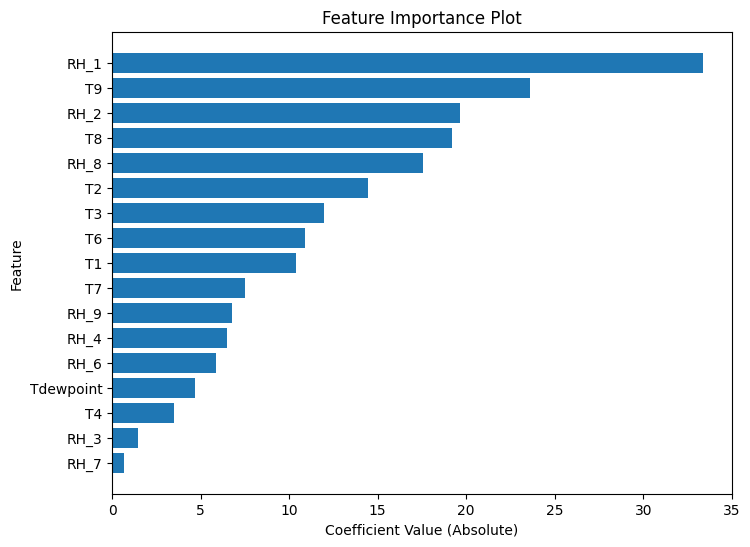

In [16]:
# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.barh(y=coef_df['Feature'], width=coef_df['Coefficient'])
plt.xlabel('Coefficient Value (Absolute)')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

In [17]:
# Creating the SVR model hyper parameter tuning.
# kernel is selected as rbf instead of linear, with maximum iteration of 10000
svr = SVR(kernel='rbf', C=1.0)
for i in range(100):
    # Fitting the SVR model
    svr.fit(X_train, ytrain)

# Making predictions on testing set
y_pred = svr.predict(X_test)


Execution time is 20min 37sec

In [18]:
# Calculating evaluation metrics for the above model
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)


print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print()

MSE: 10534.419758290851
MAE: 45.74208867283486
R2 Score: 0.013541326078909455



In [19]:
# Creating the SVR model hyper parameter tuning
# kernel is selected as sigmoid instead of rbf or linear to see results, with maximum iteration of 10000, 100 iterations 
svr = SVR(kernel='sigmoid', C=1.0)
for i in range(100):
    # Fitting the SVR model
    svr.fit(X_train, ytrain)

# Making predictions on testing set
y_pred_sig = svr.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(ytest, y_pred_sig)
mae = mean_absolute_error(ytest, y_pred_sig)
r2 = r2_score(ytest, y_pred_sig)

print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print()

MSE: 129453.58318727798
MAE: 231.04110688142853
R2 Score: -11.122225327574617



Execution time is 35min 58s

In [20]:
# Creating the SVR model hyper parameter tuning
# kernel poly is selected instead of linear, with maximum iteration of 10000, we consider 50 iterations
svr = SVR(kernel='poly', C=1.0)
for i in range(50):
    # Fitting the SVR model
    svr.fit(X_train, ytrain)

# Making predictions on testing set
y_pred_sig = svr.predict(X_test)
# 36min 54sec

# Calculating evaluation metrics
mse = mean_squared_error(ytest, y_pred_sig)
mae = mean_absolute_error(ytest, y_pred_sig)
r2 = r2_score(ytest, y_pred_sig)

print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print()

MSE: 10782.188119267472
MAE: 47.707067618078696
R2 Score: -0.00966007033556715



Execution time is 9m 2s but considering 50 iterations , time is not too high. R2 score is negative, which means that the model is worse than a simple horizontal line that predicts the mean value of the dependent variable. This is happening because the SVR model has a large error or because the dependent variable has a high degree of variability and the model is not capturing that variability well.


In [22]:
# Creating the SVR model hyper parameter tuning
# kernel is selected as rbf and gamma = 0.1 is chosen, with maximum iteration of 10000, taking 20 iterations
svr = SVR(kernel='rbf', C=1.0, gamma=0.1)
for i in range(20):
    # Fitting the SVR model
    svr.fit(X_train, ytrain)

# Making predictions on testing set
y_pred_rbf = svr.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(ytest, y_pred_rbf)
mae = mean_absolute_error(ytest, y_pred_rbf)
r2 = r2_score(ytest, y_pred_rbf)

print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print()

MSE: 10416.2721225228
MAE: 45.09520443425271
R2 Score: 0.02460484573930055



The current results are slightly better than the previous iteration. MSE has increased a bit but is almost similar , and the MAE has also decreased from 46.341 to 45.095. The R2 Score has also decreased slightly from 0.033 to 0.024, indicating that the model is almost similar and performance has improved, but overall linear kernel works better with our given dataset.
